In [4]:
# 导入所需模块
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.initializers import TruncatedNormal
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K

class SimpleVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # 创建Sequential 顺序模型层状结构
        model = Sequential()
        # 输入层的图片长度、宽度、深度（深度为RGB 3层）
        inputShape = (height, width, depth)
        chanDim = -1
        
        # 通过通道维所在位置修改chanDim
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # CONV => RELU => POOL
        # 添加卷积层，滤波器数量为32，卷积核大小为3*3（过滤器使用kernel_initializer参数指定的方法初始化为小的随机值）
        model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        #添加激活功能层，激活函数为relu
        model.add(Activation("relu"))
        #对数据做批规范化
        model.add(BatchNormalization(axis=chanDim))
        #添加最大池化层，池化窗口大小为2*2
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #model.add(Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #model.add(Dropout(0.25))

        # (CONV => RELU) * 3 => POOL
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #dropout层减少神经元，降低过拟合
        #model.add(Dropout(0.25))

        # FC层（全连接层）
        #添加Flatten层把多维的输入一维化
        model.add(Flatten())
        #添加全连接层，神经元点个数为1024
        model.add(Dense(1024,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        model.add(Dense(512,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))

        # softmax 分类
        #添加全连接层，神经元点个数为10
        model.add(Dense(classes,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("softmax"))

        return model
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # 创建Sequential 顺序模型层状结构
        model = Sequential()
        # 输入层的图片长度、宽度、深度（深度为RGB 3层）
        inputShape = (height, width, depth)
        chanDim = -1
        
        # 通过通道维所在位置修改chanDim
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        model.add(Conv2D(6, (5, 5),activation='sigmoid',input_shape=inputShape,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
        model.add(Conv2D(16, (5, 5),activation='sigmoid',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
        model.add(Flatten())
        model.add(Dense(120,activation='sigmoid'))
        model.add(Dense(84,activation='sigmoid'))
        model.add(Dense(classes,activation='softmax'))
        return model
class AlexNet:
    @staticmethod
    def build(width, height, depth, classes):
        # 创建Sequential 顺序模型层状结构
        model = Sequential()
        # 输入层的图片长度、宽度、深度（深度为RGB 3层）
        inputShape = (height, width, depth)
        chanDim = -1
        
        # 通过通道维所在位置修改chanDim
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        model.add(Conv2D(96, (3, 3),input_shape=inputShape,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
        
        model.add(Conv2D(256, (3, 3),kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
        
        model.add(Conv2D(384, (3, 3),padding='same', activation='relu',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Conv2D(384, (3, 3),padding='same', activation='relu',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Conv2D(256, (3, 3),padding='same', activation='relu',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
        
        model.add(Flatten())
        model.add(Dense(2048,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2048,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(classes,activation='softmax'))
        return model

In [5]:
import os

image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")
 
def list_images(basePath, contains=None):
    # 返回有效的图片路径数据集
    return list_files(basePath, validExts=image_types, contains=contains)
 
def list_files(basePath, validExts=None, contains=None):
    # 遍历图片数据目录，生成每张图片的路径
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # 循环遍历当前目录中的文件名
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue
 
            # 通过确定.的位置，从而确定当前文件的文件扩展名
            ext = filename[filename.rfind("."):].lower()
 
            # 检查文件是否为图像，是否应进行处理
            if validExts is None or ext.endswith(validExts):
                # 构造图像路径
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [6]:
# 导入所需工具包
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os


# 读取数据和标签
print("------开始读取数据------")
data = []
labels = []

# 拿到图像数据路径，方便后续读取
imagePaths = sorted(list(list_images('F:/101_ObjectCategories')))
random.seed(42)
random.shuffle(imagePaths)

# 遍历读取数据
for imagePath in imagePaths:
    # 读取图像数据
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (100, 150))
    data.append(image)
    # 读取标签
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# 对图像数据做scale操作
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# 数据集切分
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.3, random_state=42)

# 转换标签为one-hot encoding格式
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# 数据增强处理
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

# 建立卷积神经网络
model = SimpleVGGNet.build(width=100, height=150, depth=3,classes=len(lb.classes_))

# 设置初始化超参数
INIT_LR = 0.01
EPOCHS = 50
BS = 32

# 损失函数，编译模型
print("------准备训练网络------")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# 训练网络模型
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)
"""
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=EPOCHS, batch_size=32)
"""



------开始读取数据------
------准备训练网络------


D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
139/139 [==============================] - 188s 1s/step - loss: 4.2003 - accuracy: 0.1122 - val_loss: 4.6001 - val_accuracy: 0.0689
Epoch 2/50
139/139 [==============================] - 185s 1s/step - loss: 3.6977 - accuracy: 0.2000 - val_loss: 4.6686 - val_accuracy: 0.0068
Epoch 3/50
139/139 [==============================] - 185s 1s/step - loss: 3.4325 - accuracy: 0.2446 - val_loss: 4.4201 - val_accuracy: 0.0496
Epoch 4/50
139/139 [==============================] - 185s 1s/step - loss: 3.2495 - accuracy: 0.2778 - val_loss: 3.3828 - val_accuracy: 0.2467
Epoch 5/50
139/139 [==============================] - 184s 1s/step - loss: 3.0715 - accuracy: 0.3077 - val_loss: 3.7287 - val_accuracy: 0.2008
Epoch 6/50
139/139 [==============================] - 185s 1s/step - loss: 2.9271 - accuracy: 0.3307 - val_loss: 2.8567 - val_accuracy: 0.3417
Epoch 7/50
139/139 [==============================] - 192s 1s/step - loss: 2.7793 - accuracy: 0.3602 - val_loss: 2.8515 - val_accuracy: 0.3427

'\nH = model.fit(trainX, trainY, validation_data=(testX, testY),\n    epochs=EPOCHS, batch_size=32)\n'

------测试网络------
                   precision    recall  f1-score   support

BACKGROUND_Google       0.12      0.09      0.11        22
            Faces       0.93      0.99      0.96       132
       Faces_easy       0.97      0.98      0.98       125
         Leopards       0.92      0.73      0.81        30
       Motorbikes       0.68      0.94      0.79        16
        accordion       0.33      0.93      0.48        15
        airplanes       0.90      0.95      0.93        20
           anchor       0.50      0.12      0.20        16
              ant       0.00      0.00      0.00        11
           barrel       0.44      0.36      0.40        11
             bass       0.47      0.44      0.45        16
           beaver       0.29      0.12      0.17        16
        binocular       0.62      0.45      0.53        11
           bonsai       0.67      0.80      0.73        15
            brain       0.64      0.76      0.70        21
     brontosaurus       0.50      0.12

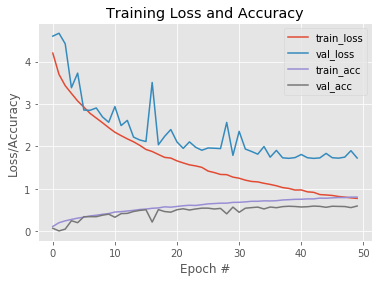

In [12]:

# 测试
print("------测试网络------")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

# 绘制结果曲线
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('F:/output2/cnn_plot2.png')

# 保存模型
print("------正在保存模型------")
model.save('F://output2/cnn2.model')
f = open('F://output2/cnn_lb2.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

In [29]:
# 导入所需工具包
from tensorflow.keras.models import load_model
import argparse
import pickle
import cv2


# 加载测试数据并进行相同预处理操作
image = cv2.imread('F:/101test/trilobite.jpg')
output = image.copy()
image = cv2.resize(image, (100, 150))

# scale图像数据
image = image.astype("float") / 255.0

# 对图像进行拉平操作
image = image.reshape((1, image.shape[0], image.shape[1],image.shape[2]))

# 读取模型和标签
print("------读取模型和标签------")
model = load_model('F://output/cnn2.model')
lb = pickle.loads(open('F://output/cnn_lb2.pickle', "rb").read())

# 预测
preds = model.predict(image)

# 得到预测结果以及其对应的标签
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

# 在图像中把结果画出来
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(0, 0, 255), 1)

# 绘图
cv2.imshow("Image", output)
cv2.waitKey(0)

------读取模型和标签------


-1